In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/armaa/OneDrive/Documents/GitHub/Flip_robo_internship/HR Analysis/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
data.shape

(1470, 35)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

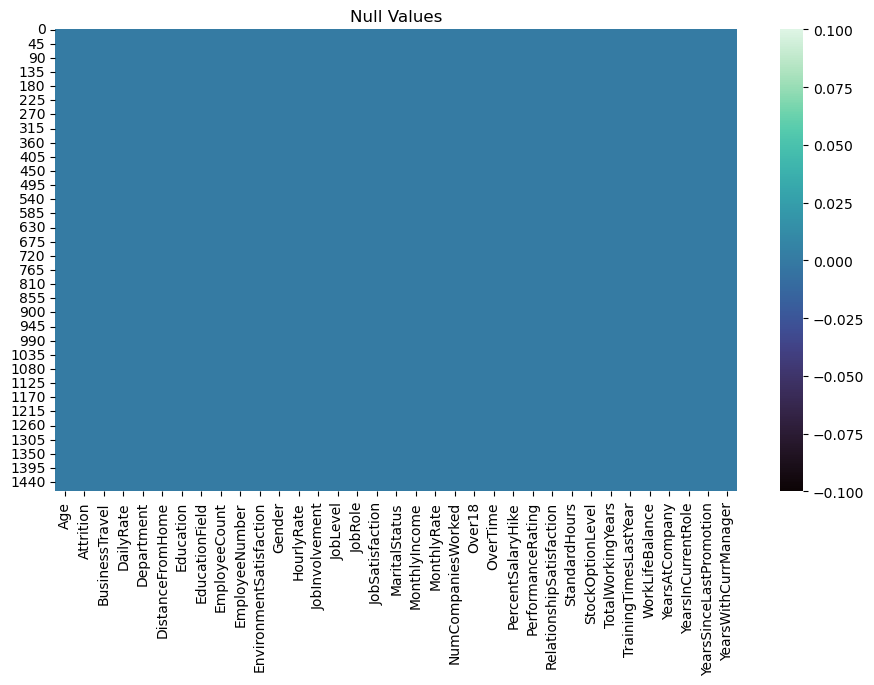

In [10]:
plt.figure(figsize = [11,6])
sns.heatmap(data.isnull(),cmap = 'mako')
plt.title('Null Values')
plt.show()


In [11]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


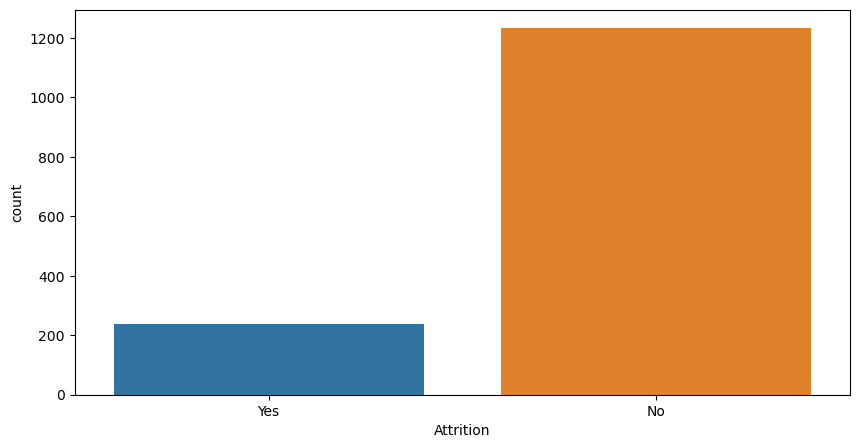

In [14]:
plt.figure(figsize = [10,5])
sns.countplot(x='Attrition',data=data)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

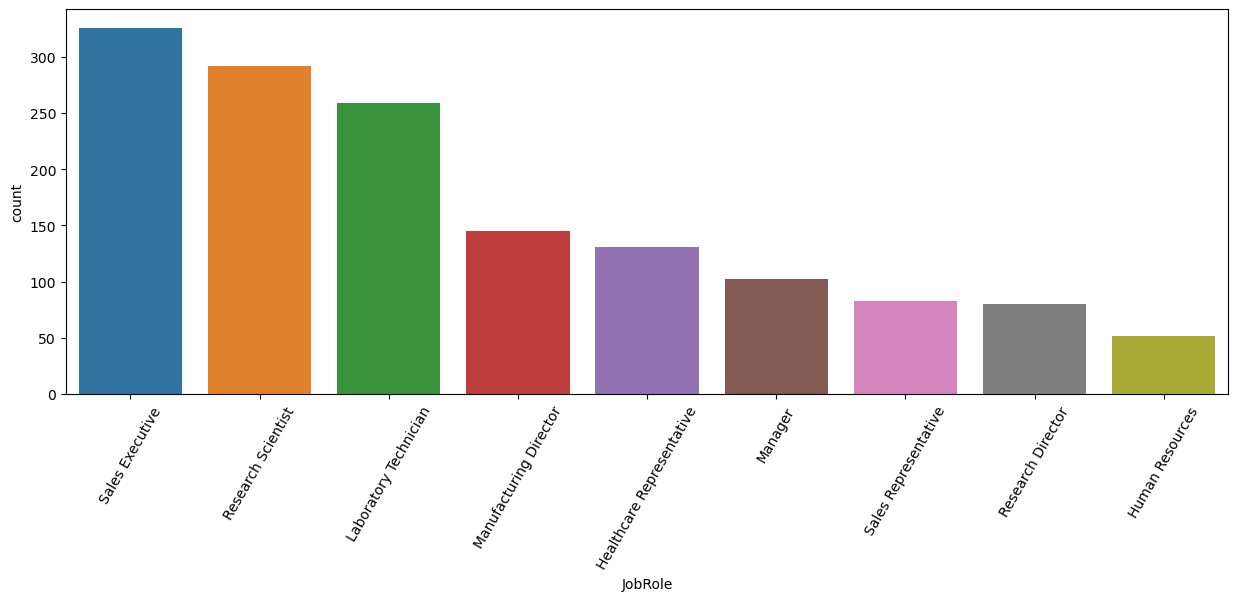

In [15]:
plt.figure(figsize = [15,5])

sns.countplot(x='JobRole',data=data)
plt.xticks(rotation=60)

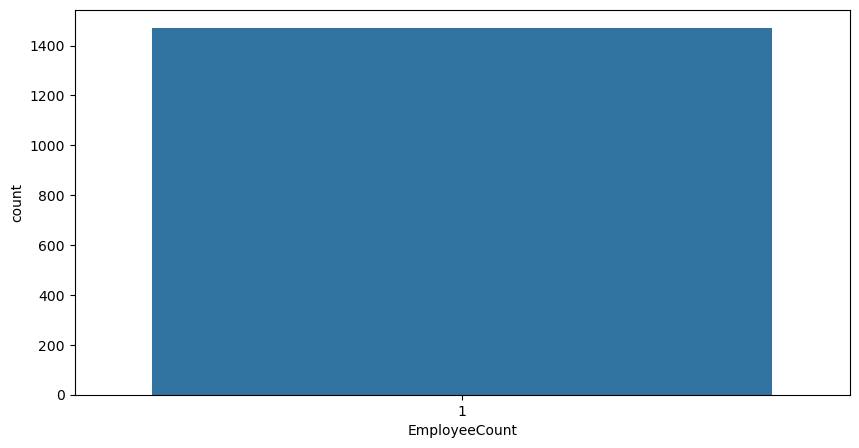

In [16]:
plt.figure(figsize = [10,5])
sns.countplot(x='EmployeeCount',data=data)
plt.show()

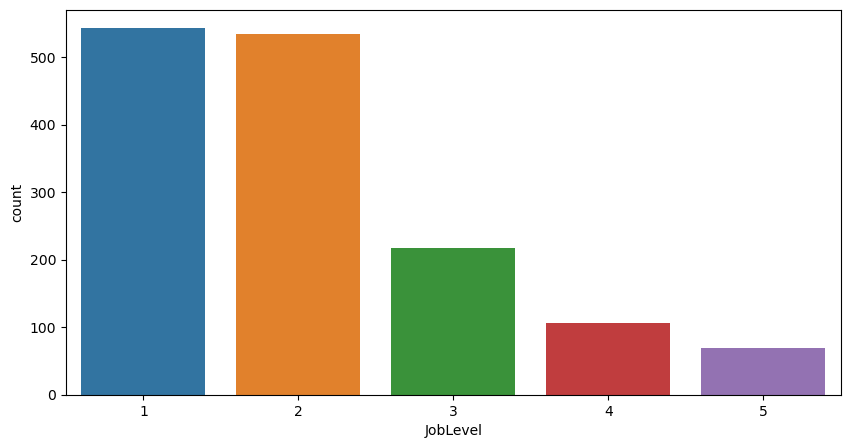

In [17]:
plt.figure(figsize = [10,5])
sns.countplot(x='JobLevel',data=data)
plt.show()

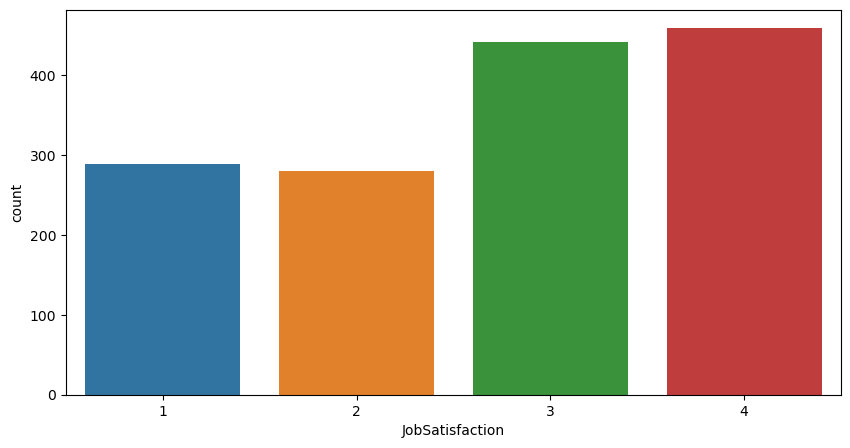

In [18]:
plt.figure(figsize = [10,5])
sns.countplot(x='JobSatisfaction',data=data)
plt.show()

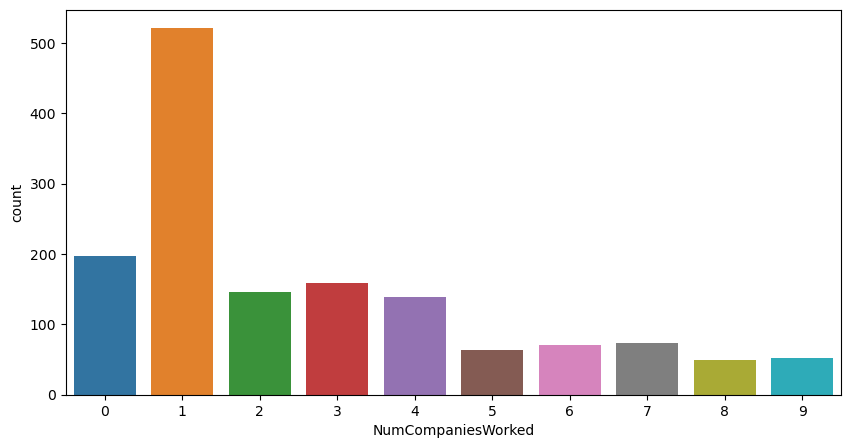

In [19]:
plt.figure(figsize = [10,5])
sns.countplot(x='NumCompaniesWorked',data=data)
plt.show()

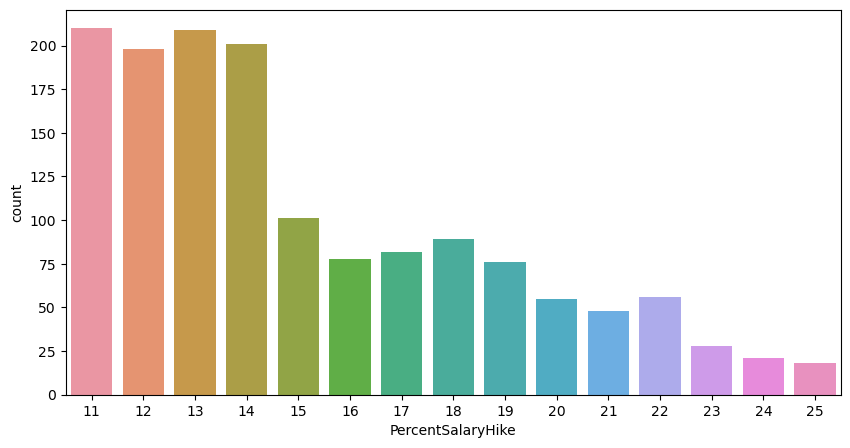

In [20]:
plt.figure(figsize = [10,5])
sns.countplot(x='PercentSalaryHike',data=data)
plt.show()

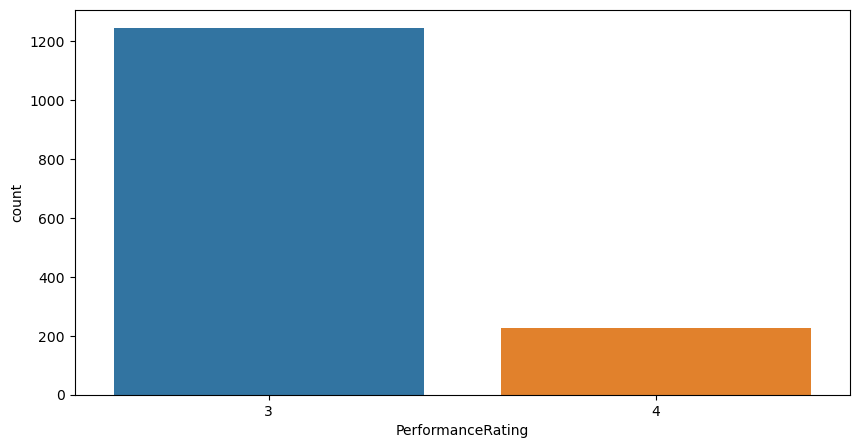

In [21]:
plt.figure(figsize = [10,5])
sns.countplot(x='PerformanceRating',data=data)
plt.show()

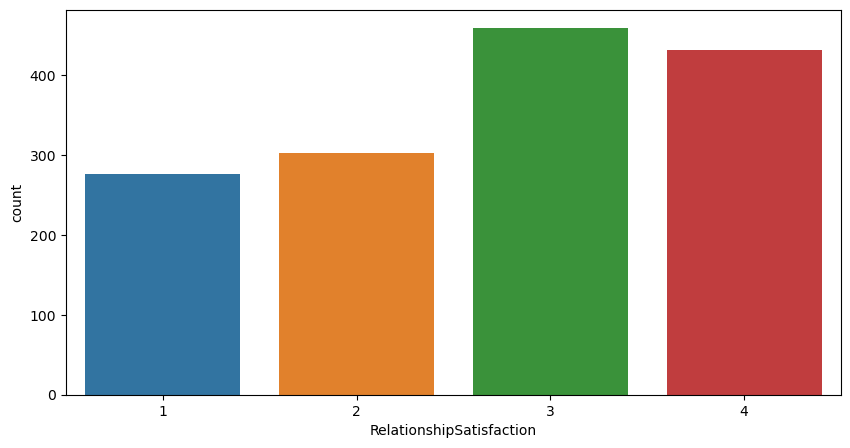

In [22]:
plt.figure(figsize = [10,5])
sns.countplot(x='RelationshipSatisfaction',data=data)
plt.show()

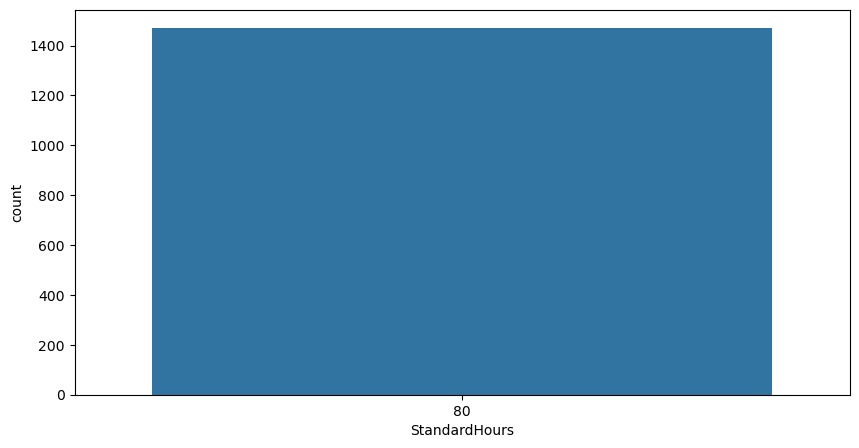

In [23]:
plt.figure(figsize = [10,5])
sns.countplot(x='StandardHours',data=data)
plt.show()

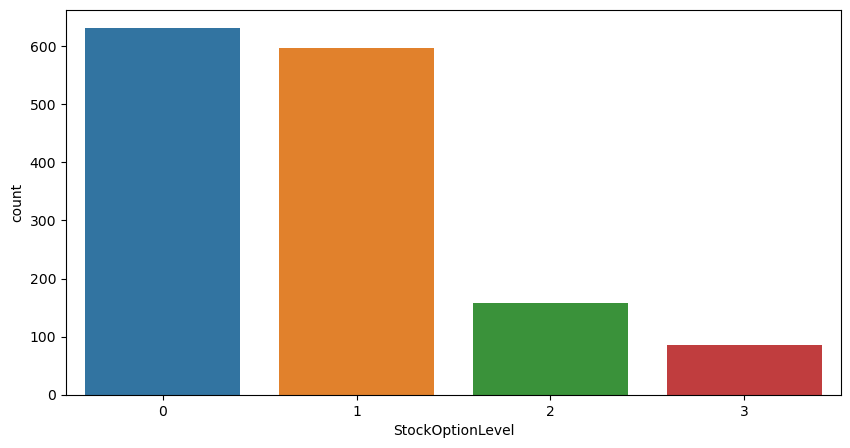

In [24]:
plt.figure(figsize = [10,5])
sns.countplot(x='StockOptionLevel',data=data)
plt.show()

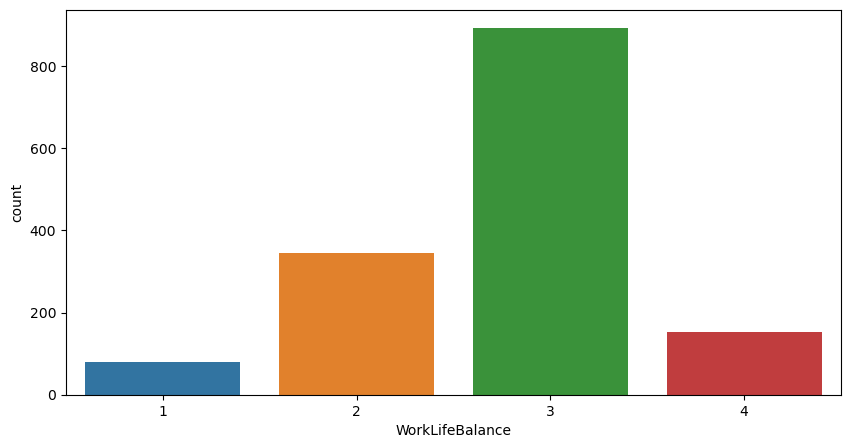

In [25]:
plt.figure(figsize = [10,5])
sns.countplot(x='WorkLifeBalance',data=data)
plt.show()

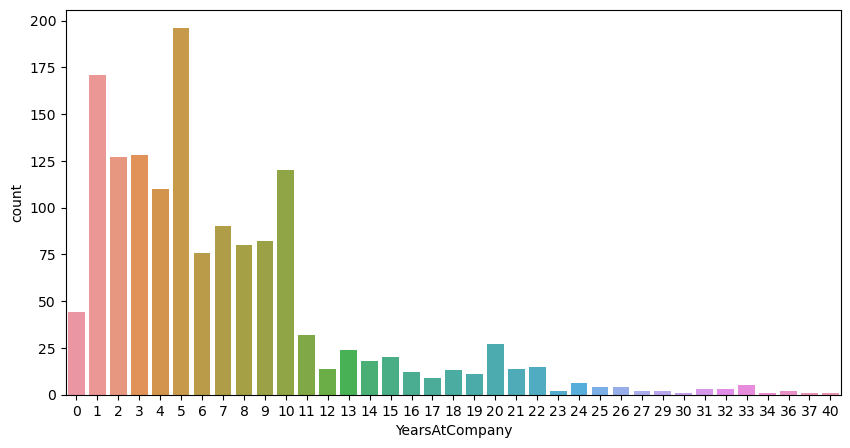

In [26]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsAtCompany',data=data)
plt.show()

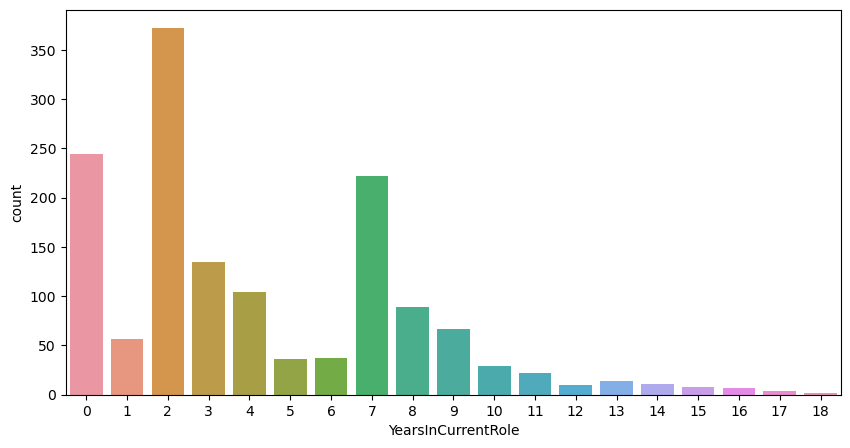

In [27]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsInCurrentRole',data=data)
plt.show()

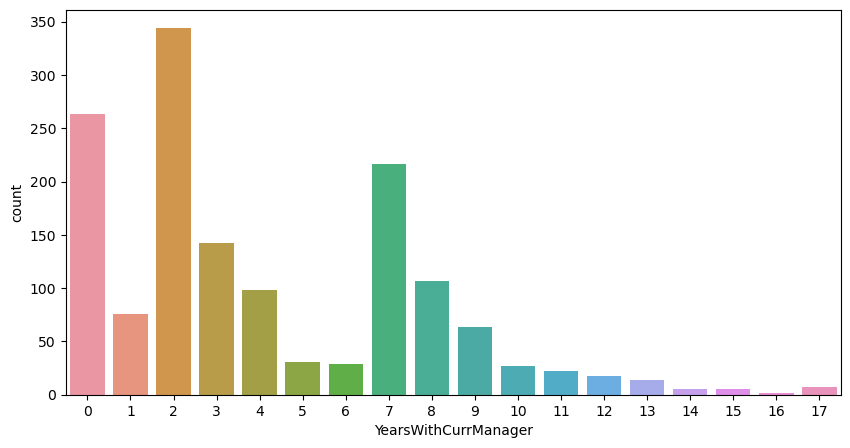

In [28]:
plt.figure(figsize = [10,5])
sns.countplot(x='YearsWithCurrManager',data=data)
plt.show()

<AxesSubplot:>

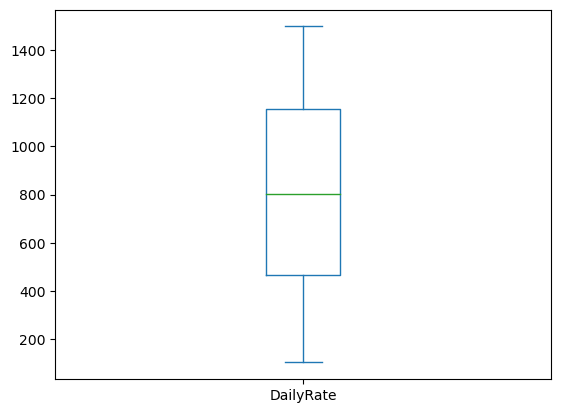

In [29]:
data['DailyRate'].plot.box()

<AxesSubplot:>

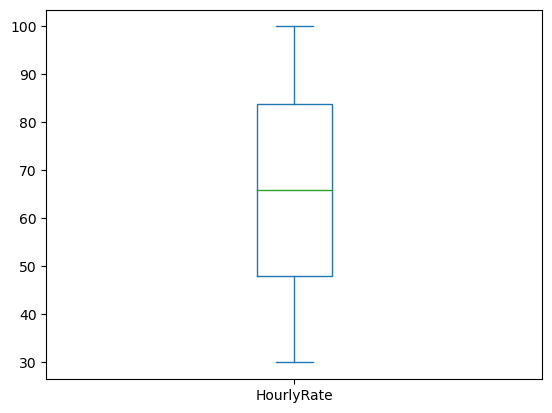

In [30]:
data['HourlyRate'].plot.box()

<AxesSubplot:>

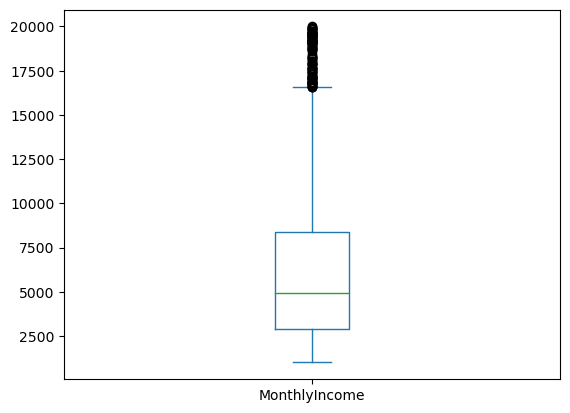

In [31]:
data['MonthlyIncome'].plot.box()

<AxesSubplot:>

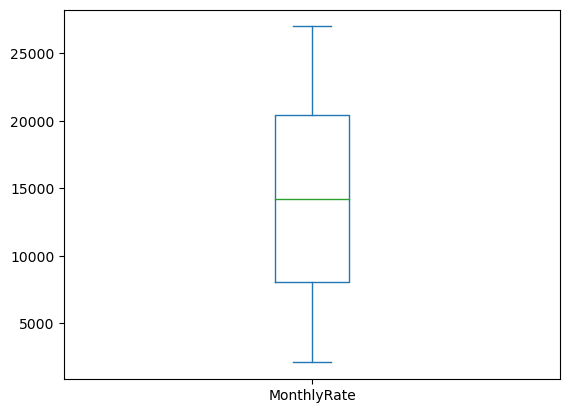

In [32]:
data['MonthlyRate'].plot.box()

Text(0.5, 0, 'Marital Status')

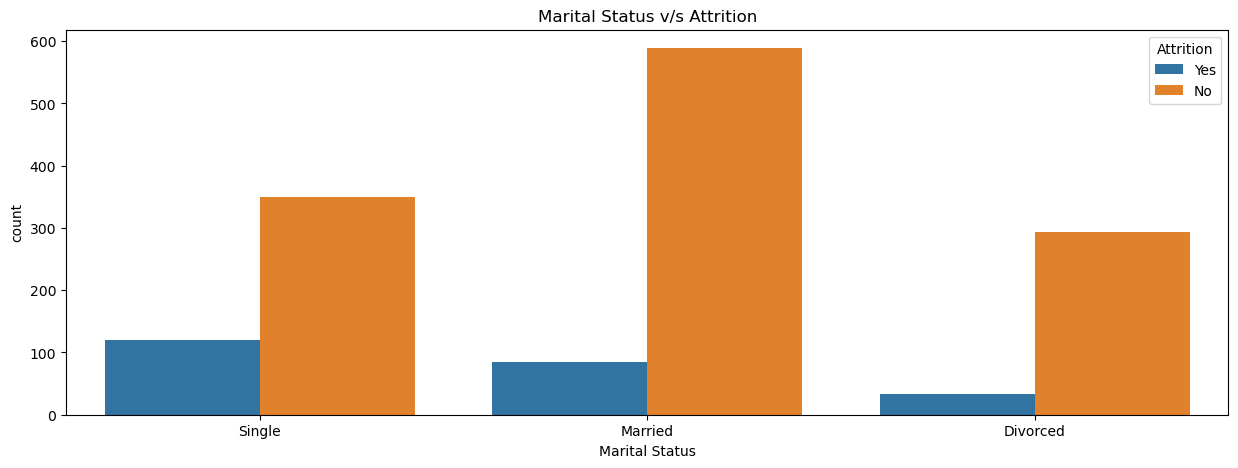

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x='MaritalStatus',hue='Attrition',data=data)
plt.title('Marital Status v/s Attrition')
plt.xlabel('Marital Status')

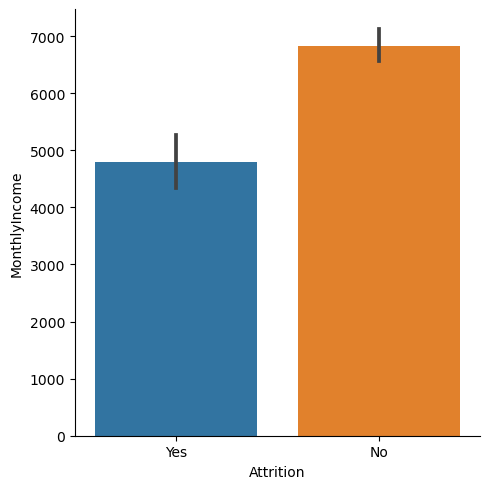

In [34]:
sns.factorplot(data=data,kind='bar',x='Attrition',y='MonthlyIncome')

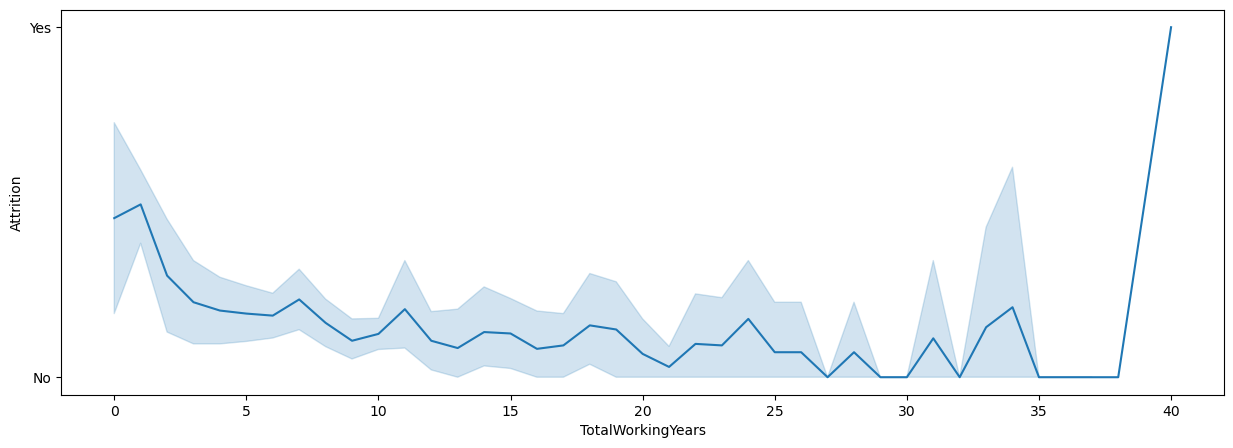

In [35]:
plt.figure(figsize=(15,5))
sns.lineplot(x='TotalWorkingYears',y='Attrition',data=data)
plt.show()

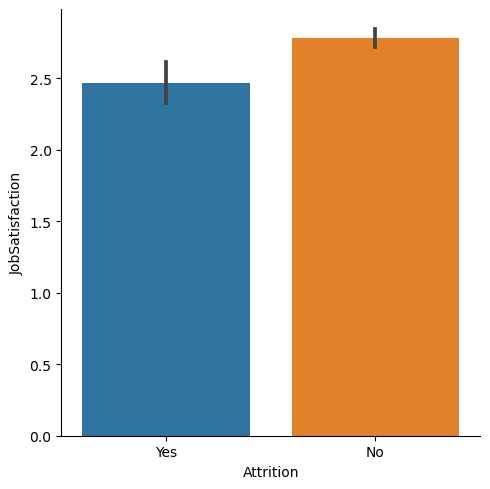

In [37]:
sns.factorplot(data=data,kind='bar',x='Attrition',y='JobSatisfaction')

<AxesSubplot:xlabel='Gender', ylabel='count'>

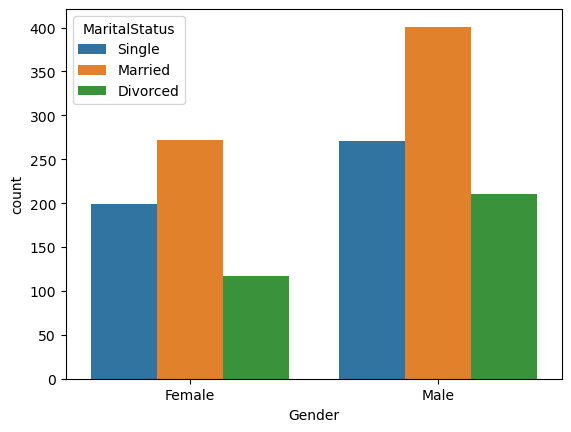

In [38]:
sns.countplot(data=data,x='Gender',hue='MaritalStatus')

<AxesSubplot:>

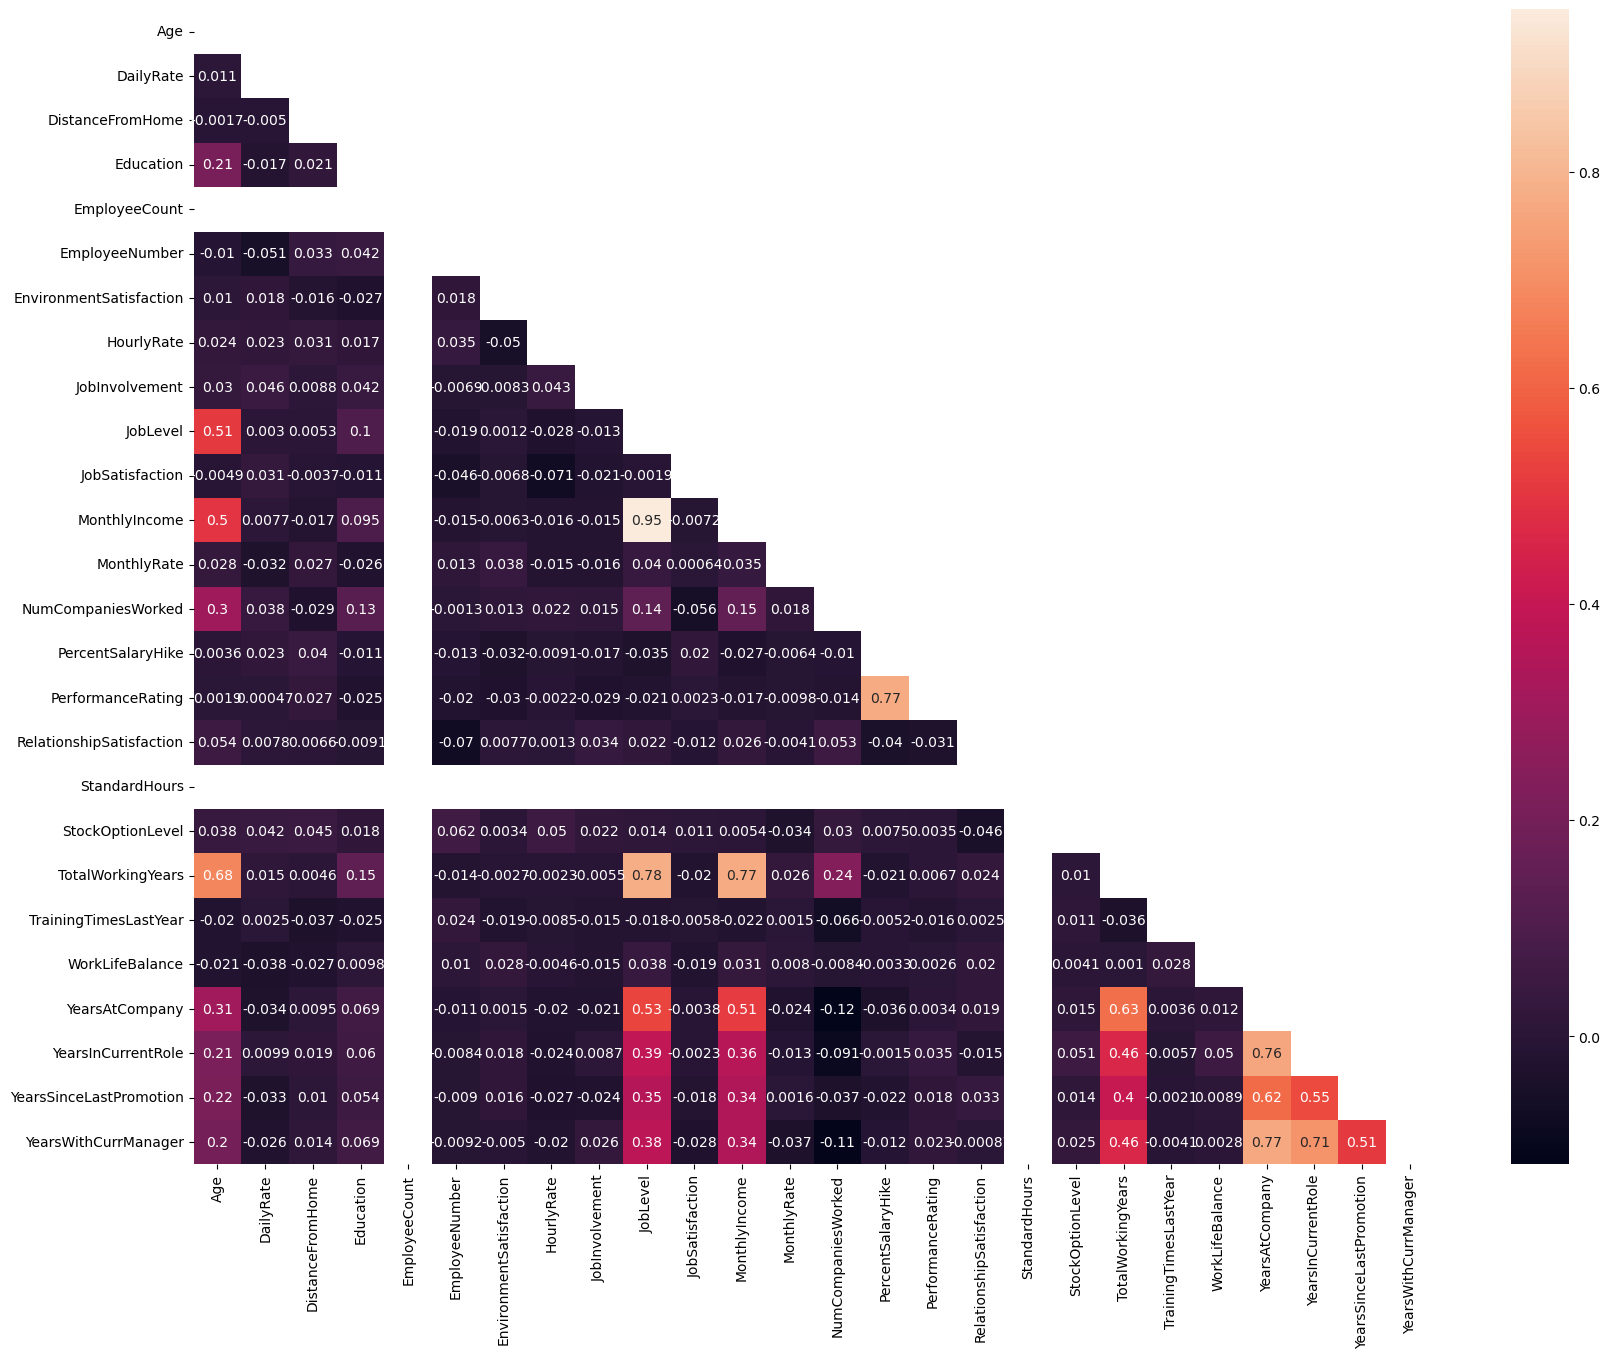

In [40]:
plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

In [41]:
data_outliers=data[['MonthlyIncome']]

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

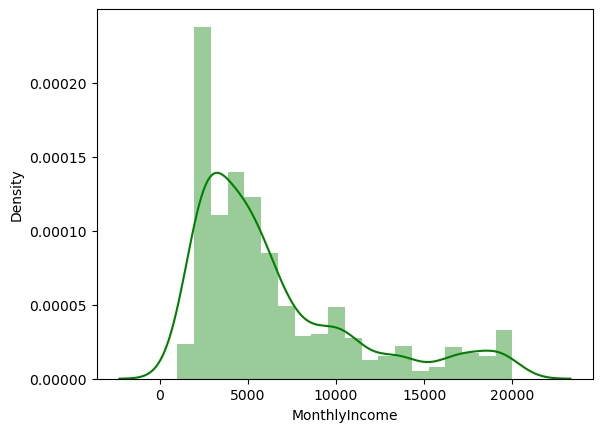

In [42]:
sns.distplot(data_outliers['MonthlyIncome'],color = 'Green')

In [43]:
Q1 = data_outliers.quantile(0.25)
Q3 = data_outliers.quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data_outliers < (Q1-1.5*IQR)) | (data_outliers> (Q3 + 1.5*Q3))).any(axis = 1)]

In [44]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (1470, 35)
Shape After          : (1470, 35)
Percentage Loss      : 0.0


In [45]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(data_outliers))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [49]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (1470, 35)
Shape After          : (1470, 35)
Percentage Loss      : 0.0


In [50]:
df = data.copy()

In [51]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

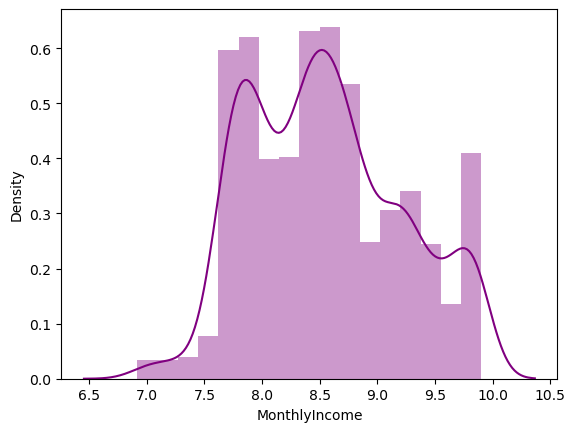

In [52]:
df['MonthlyIncome']=np.log1p(df['MonthlyIncome'])
sns.distplot(df['MonthlyIncome'],color = 'Purple')

In [53]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [54]:
data = df.copy()

In [55]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [56]:
data['StandardHours'].value_counts()


80    1470
Name: StandardHours, dtype: int64

In [57]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [58]:
data = data.drop(columns = ['EmployeeCount','Over18','StandardHours','EmployeeNumber'])

<AxesSubplot:>

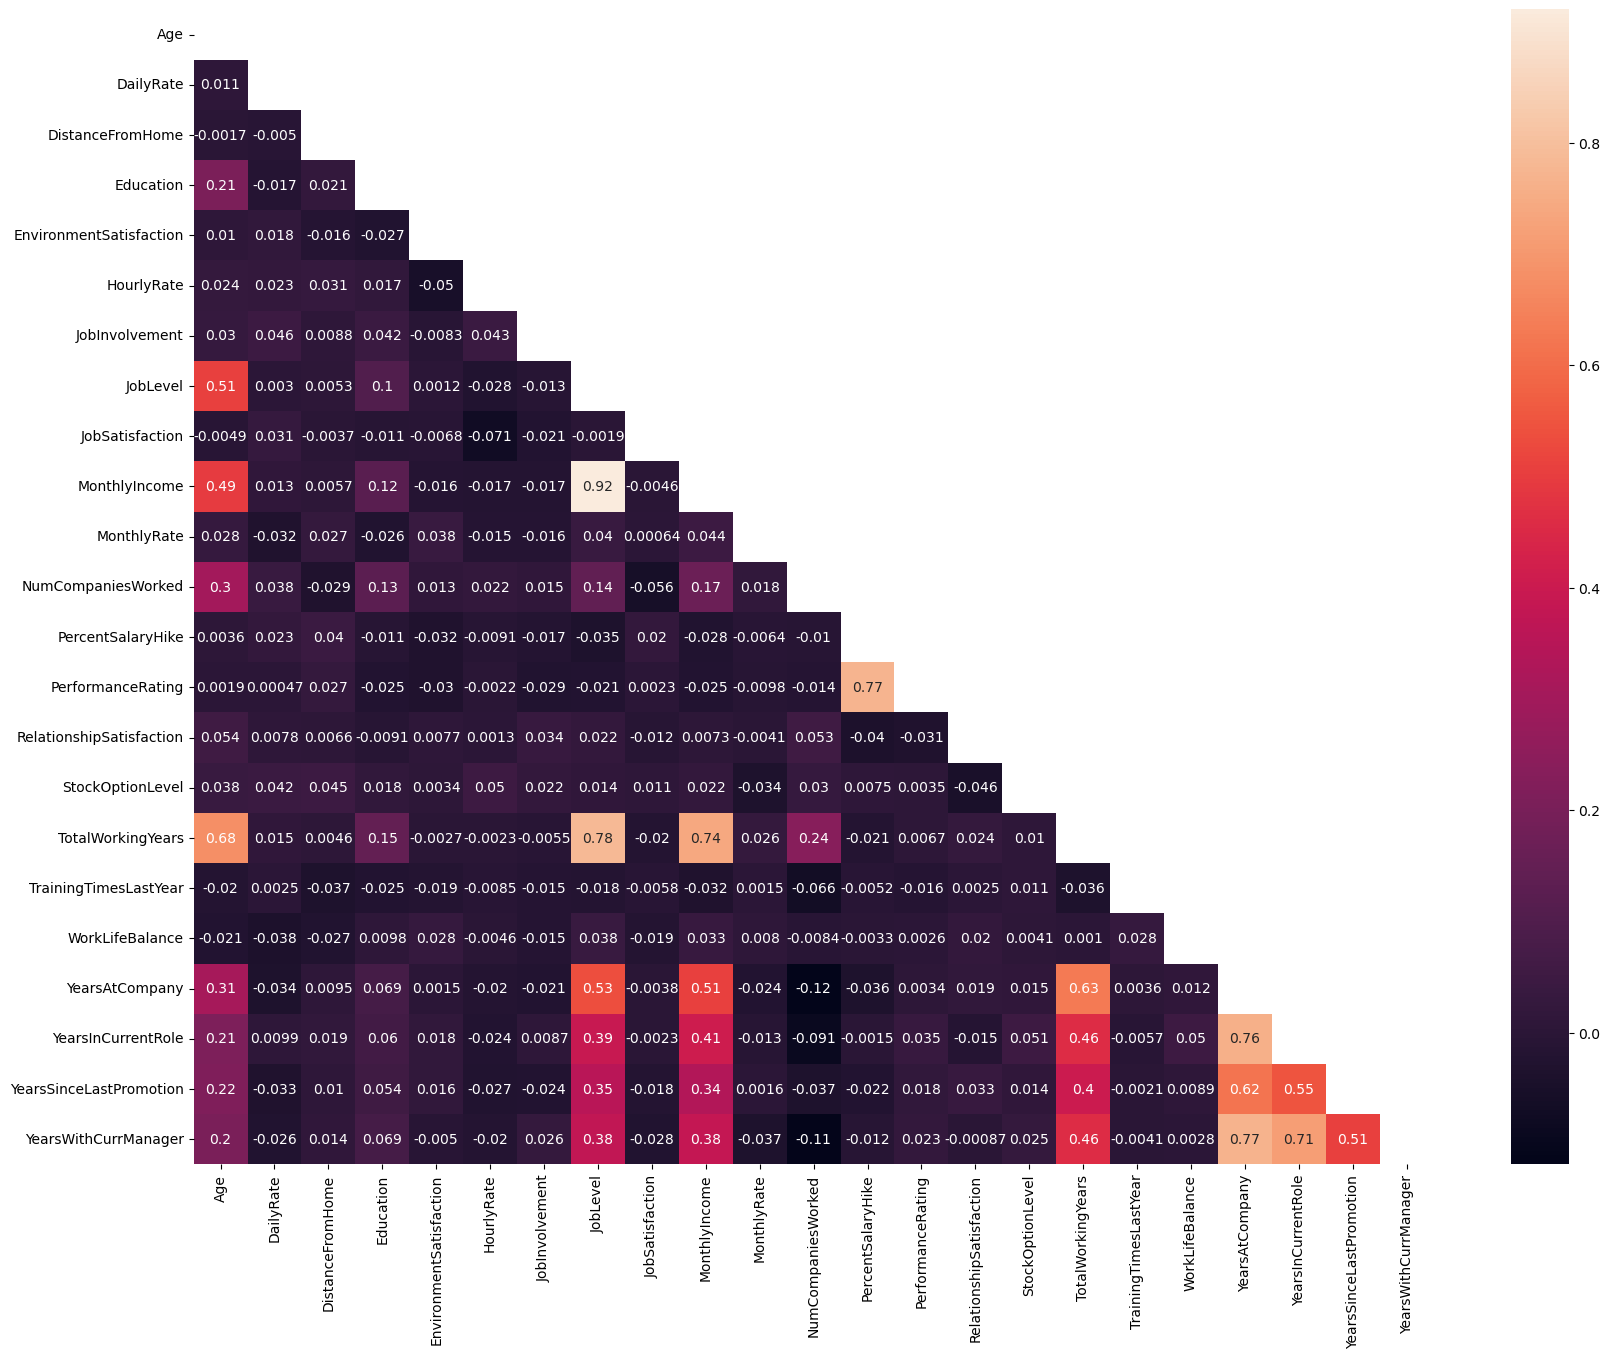

In [59]:
plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
     if data[i].dtypes=='object':
            data[i]= le.fit_transform(data[i].values.reshape(-1,1))
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [61]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [62]:
data.dtypes

Age                           int64
Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany              

In [63]:
X = data.drop(columns = 'Attrition')
Y = data['Attrition']

In [64]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [65]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

In [66]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

In [70]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.8744939271255061  with Random State  18


In [71]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20, random_state=maxAcc) 

y_train.sample(5)

1868    1
443     1
1506    1
16      0
2363    1
Name: Attrition, dtype: int32

In [72]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train)
y_pred_log = Log_Reg.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)

Accuracy Score: 0.8744939271255061


In [74]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))

print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.65587045 0.86612576 0.86206897 0.86612576 0.88032454]
Avg_Cross_Validation Score:  0.8261030951540185


In [76]:
!pip install scikit-plot matplotlib

Defaulting to user installation because normal site-packages is not writeable


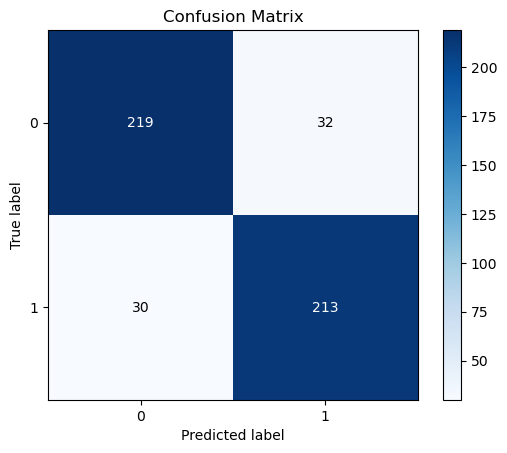

In [77]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()

In [78]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       251
           1       0.87      0.88      0.87       243

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494



In [79]:
from sklearn.ensemble import RandomForestClassifier

Rand = RandomForestClassifier(random_state = 3)
Rand.fit(x_train,y_train)
y_pred_rand = Rand.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_rand))
A2 = accuracy_score(y_test,y_pred_rand)

Accuracy Score: 0.9068825910931174


In [81]:
print("Cross Validation Score: ", cross_val_score(Rand,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Rand,X_scaled,Y_over,cv=5).mean())
CV2 = cross_val_score(Rand,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.72267206 0.95131846 0.92494929 0.92494929 0.93711968]
Avg_Cross_Validation Score:  0.8922017557546542


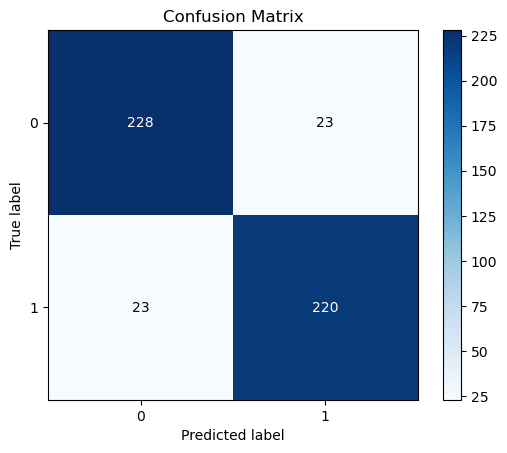

In [82]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rand)
plt.show()

In [83]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       251
           1       0.91      0.91      0.91       243

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



In [84]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [85]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_dt))
A3 = accuracy_score(y_test,y_pred_dt)

Accuracy Score: 0.7975708502024291


In [86]:
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(dt,X_scaled,Y_over,cv=5).mean())
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.65587045 0.8356998  0.8296146  0.78904665 0.831643  ]
Avg_Cross_Validation Score:  0.7912130145929654


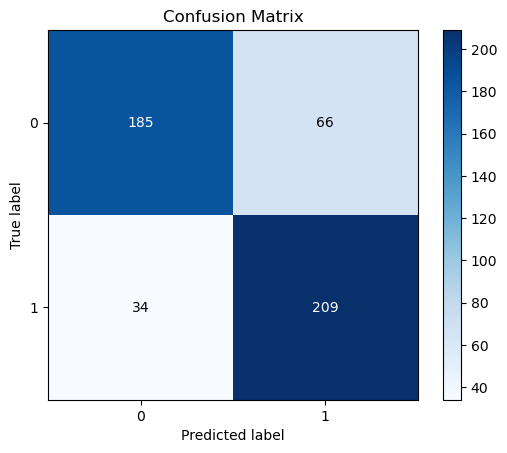

In [87]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
plt.show()

In [88]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       251
           1       0.76      0.86      0.81       243

    accuracy                           0.80       494
   macro avg       0.80      0.80      0.80       494
weighted avg       0.80      0.80      0.80       494



In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred_knn))
A4 = accuracy_score(y_test,y_pred_knn)

Accuracy Score: 0.8481781376518218


In [91]:
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(knn,X_scaled,Y_over,cv=5).mean())
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.80364372 0.87018256 0.84584178 0.82758621 0.85395538]
Avg_Cross_Validation Score:  0.8402419295234498


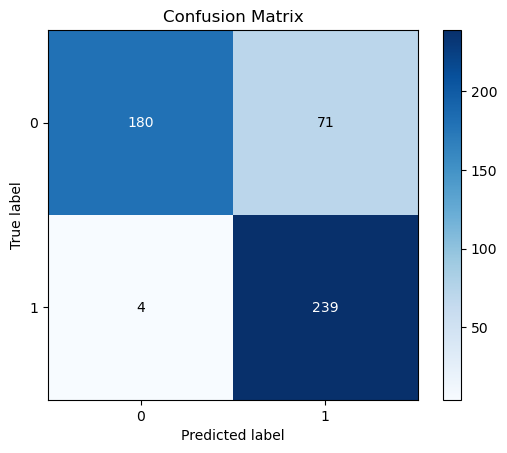

In [92]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()

In [93]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       251
           1       0.77      0.98      0.86       243

    accuracy                           0.85       494
   macro avg       0.87      0.85      0.85       494
weighted avg       0.88      0.85      0.85       494



In [94]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=100,random_state=40,algorithm='SAMME')
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)

In [95]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_adb))
A5 = accuracy_score(y_test,y_pred_adb)

Accuracy Score: 0.868421052631579


In [96]:
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(adb,X_scaled,Y_over,cv=5).mean())
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.63765182 0.91075051 0.87829615 0.84989858 0.88032454]
Avg_Cross_Validation Score:  0.8313843197477231


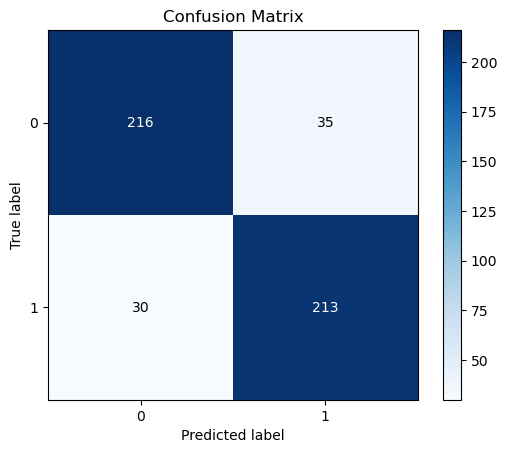

In [97]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_adb)
plt.show()

In [98]:
print(classification_report(y_test,y_pred_adb))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       251
           1       0.86      0.88      0.87       243

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494



In [99]:
from sklearn.svm import SVC

sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_pred_sv = sv.predict(x_test)

In [100]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_sv))
A6 = accuracy_score(y_test,y_pred_sv)

Accuracy Score: 0.9068825910931174


In [101]:
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(sv,X_scaled,Y_over,cv=5).mean())
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()

Cross Validation Score:  [0.63765182 0.94320487 0.93103448 0.93306288 0.92900609]
Avg_Cross_Validation Score:  0.8747920276584736


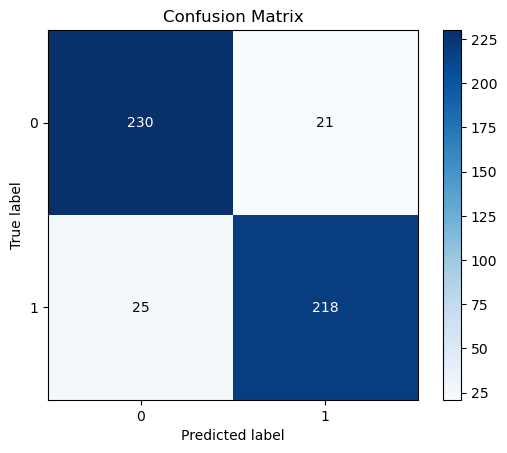

In [102]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()

In [103]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       251
           1       0.91      0.90      0.90       243

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



In [104]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree','KNeighbors Classifier','AdaBoostClassifier','SVC'],'Accuracy_Score':[A1,A2,A3,A4,A5,A6],'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6]})
Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [105]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.874494,0.826103,0.048391
1,Random Forest Classifier,0.906883,0.892202,0.014681
2,Decision Tree,0.797571,0.786751,0.010819
3,KNeighbors Classifier,0.848178,0.840242,0.007936
4,AdaBoostClassifier,0.868421,0.831384,0.037037
5,SVC,0.906883,0.874792,0.032091


In [109]:
from sklearn.model_selection import GridSearchCV

param_grid={'algorithm': ['kd_tree', 'brute'],'leaf_size': [15, 18, 20,25,30],'n_neighbors': [3, 5, 7, 13],
            'weights':['uniform', 'distance'],'metric':['euclidean','manhattan','minkowski','chebyshev']}

gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20, 25, 30],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [3, 5, 7, 13],
                         'weights': ['uniform', 'distance']})

In [110]:
print(gridsearch.best_score_, gridsearch.best_params_)

0.870681745164814 {'algorithm': 'kd_tree', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [111]:
KNN = KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=7 ,weights = 'distance',metric = 'manhattan')
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

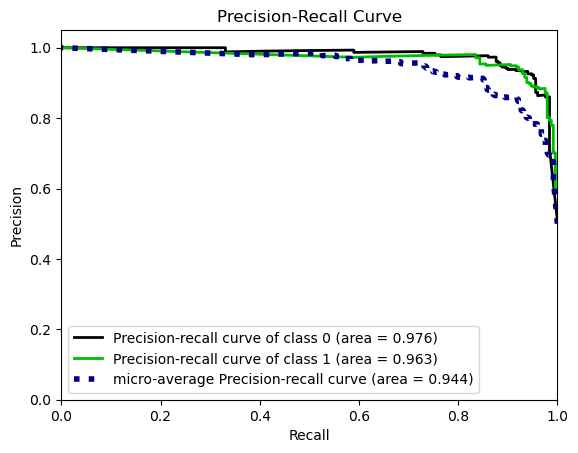

In [112]:
import matplotlib.pyplot as plt
import scikitplot as skplt
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

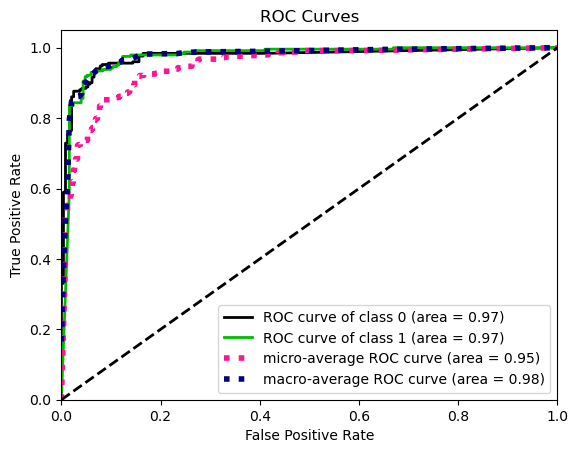

In [113]:
import matplotlib.pyplot as plt
import scikitplot as skplt
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, probas)

plt.show()

In [114]:
import joblib
joblib.dump(KNN,'HR_Attrition_Prediction.obj')

['HR_Attrition_Prediction.obj']

In [115]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score: ", cross_val_score(KNN,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(KNN,X_scaled,Y_over,cv=5).mean())

Accuracy Score: 0.8704453441295547
Cross Validation Score:  [0.84412955 0.90669371 0.87423935 0.87423935 0.88235294]
Avg_Cross_Validation Score:  0.8763309819250888


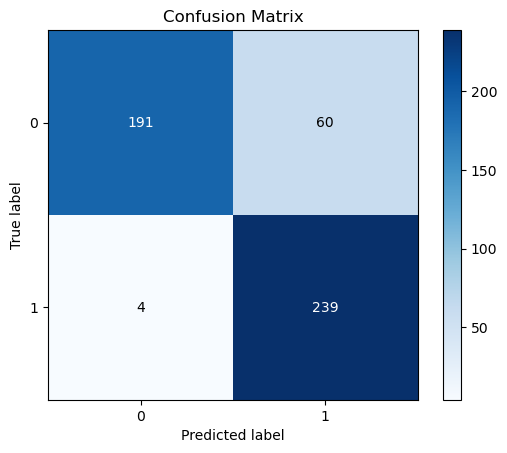

In [116]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       251
           1       0.80      0.98      0.88       243

    accuracy                           0.87       494
   macro avg       0.89      0.87      0.87       494
weighted avg       0.89      0.87      0.87       494

